<a href="https://colab.research.google.com/github/ShubhamPrakash108/ICDEC_2024_Challenge_Vehicle_Detection_in_Various_Weather_Conditions-VDVWC-/blob/main/ICDEC_2024_Challenge_Vehicle_Detection_in_Various_Weather_Conditions(VDVWC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to my notebook. This notebook contains a comprehensive collection of my work and insights, meticulously organized to guide you through the various aspects of the project. I hope you find the content informative and the presentation clear, as it reflects my dedication to providing a thorough and well-structured analysis.

Note: To facilitate the execution of the YOLO model, I manually converted the image folder into the appropriate YOLO format. This involved reorganizing the images and their corresponding annotation files to comply with the YOLO requirements. Specifically, the images and their associated text files, which contain the annotations, are now stored in separate folders but maintain a consistent order to ensure accurate mapping between the data sets. This reorganization ensures the model can correctly interpret and utilize the image data and its annotations during processing.

Updated Dataset link(It is ***private***):https://www.kaggle.com/datasets/shubhamprakash108/dataset


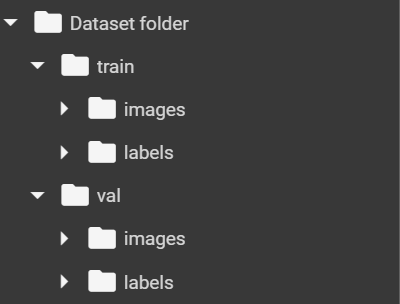

In [ ]:
#importing the data to colab notebook
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhamprakash108/dataset

Dataset URL: https://www.kaggle.com/datasets/shubhamprakash108/dataset
License(s): unknown
100% 545M/547M [00:27<00:00, 18.1MB/s]
100% 547M/547M [00:27<00:00, 20.7MB/s]


In [ ]:
#Unzipping the data folder
import zipfile
import os

zip_file_path = '/content/dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()


Visualizing the random images and it's annotation.

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define paths
image_folder = '/content/Dataset folder/train/images'
label_folder = '/content/Dataset folder/train/labels'

# Get list of images and labels
images = os.listdir(image_folder)
labels = os.listdir(label_folder)



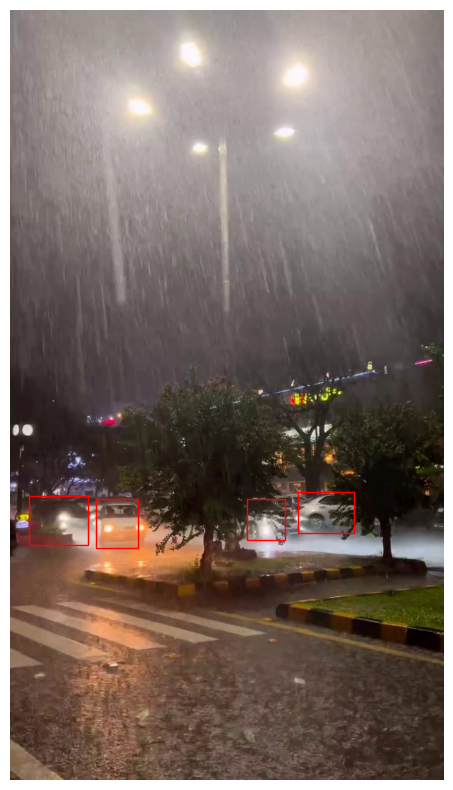

In [ ]:
# Choose a random image
random_image = random.choice(images)
image_path = os.path.join(image_folder, random_image)

# Corresponding label file
label_file = random_image.replace('.jpg', '.txt')
label_path = os.path.join(label_folder, label_file)

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the labels
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Plot the bounding boxes
for label in label_data:
    label = label.strip().split()
    class_id, x_center, y_center, width, height = map(float, label)

    # Convert YOLO format to bounding box coordinates
    img_height, img_width, _ = image.shape
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = int(x_center - width / 2)
    x_max = int(x_center + width / 2)
    y_min = int(y_center - height / 2)
    y_max = int(y_center + height / 2)

    # Draw rectangle
    rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

Creating .yaml file.

In [ ]:
dataset_yaml = """
train: /content/Dataset folder/train/images
val: /content/Dataset folder/val/images
nc: 15  # number of classes
names: ['car','bike','auto','rickshaw','cycle','bus','minitruck','truck','van','taxi','motorvan','toto','train','boat','cycle van']  # class names
"""


with open('/content/Dataset folder/dataset.yaml', 'w') as file:
    file.write(dataset_yaml)


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/78.2 GB disk)


In [ ]:
import torch
from ultralytics import YOLO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_train = YOLO('yolov8n.yaml').to(device)
data_yaml_path = "/content/Dataset folder/dataset.yaml"
model_train.train(data=data_yaml_path, epochs=50, imgsz=640, device=device)


engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Dataset folder/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fal

train: Scanning /content/Dataset folder/train/labels.cache... 2600 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2600/2600 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Dataset folder/train/images/rainy day (236).jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Dataset folder/val/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.94G       3.89      5.138      4.116         54        640: 100%|██████████| 163/163 [01:34<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all        200       1199   0.000284    0.00645   0.000152   5.31e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.86G      3.397      4.202      3.244         95        640: 100%|██████████| 163/163 [01:27<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        200       1199    0.00138     0.0633    0.00163   0.000517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.6G      3.071      3.568      2.664         75        640: 100%|██████████| 163/163 [01:27<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        200       1199      0.722      0.019     0.0169    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.63G      2.779       3.06      2.313         92        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        200       1199      0.633      0.032     0.0237    0.00719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.71G      2.609      2.772      2.123        126        640: 100%|██████████| 163/163 [01:25<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


                   all        200       1199      0.451     0.0545      0.043     0.0147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.71G      2.498      2.582      2.009         92        640: 100%|██████████| 163/163 [01:42<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


                   all        200       1199      0.595     0.0817     0.0653      0.025

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.91G      2.418      2.439       1.93         85        640: 100%|██████████| 163/163 [01:27<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


                   all        200       1199       0.68     0.0663     0.0757     0.0261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.58G      2.359      2.336       1.89         95        640: 100%|██████████| 163/163 [01:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        200       1199      0.605     0.0842     0.0713     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.58G      2.307      2.254      1.842         93        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        200       1199      0.733     0.0904        0.1     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.72G      2.272      2.155      1.805         91        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        200       1199      0.588      0.114      0.118     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.72G      2.237      2.087      1.766         96        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all        200       1199      0.263      0.143      0.123     0.0436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.49G      2.212      2.022      1.742         53        640: 100%|██████████| 163/163 [01:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        200       1199      0.126      0.154      0.128     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.62G      2.187      1.955      1.716         73        640: 100%|██████████| 163/163 [01:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        200       1199      0.194      0.164      0.153     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.71G      2.159      1.914      1.706        102        640: 100%|██████████| 163/163 [01:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        200       1199      0.278      0.196      0.187       0.09

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.81G      2.139      1.864      1.685        122        640: 100%|██████████| 163/163 [01:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        200       1199      0.204      0.206      0.159     0.0571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.5G      2.122       1.83      1.677        143        640: 100%|██████████| 163/163 [01:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


                   all        200       1199      0.255       0.21      0.187     0.0759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.46G      2.109      1.772      1.645         72        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200       1199      0.289       0.17      0.177     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.81G      2.089      1.741      1.627        107        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all        200       1199      0.298      0.242      0.225     0.0996

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.62G      2.074      1.722      1.632         55        640: 100%|██████████| 163/163 [01:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200       1199      0.277      0.232      0.229      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.63G      2.053      1.661      1.606        109        640: 100%|██████████| 163/163 [01:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        200       1199      0.224      0.234      0.234        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.53G      2.046      1.637      1.597         72        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        200       1199      0.296      0.289      0.265      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.5G      2.037      1.612      1.586         80        640: 100%|██████████| 163/163 [01:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


                   all        200       1199      0.402      0.263      0.268      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.48G      2.016      1.591      1.581         89        640: 100%|██████████| 163/163 [01:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        200       1199      0.336      0.264      0.261      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.63G      2.005      1.566      1.566        110        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        200       1199      0.319      0.258      0.276      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.73G      1.996      1.547      1.565        129        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200       1199      0.365       0.27      0.273      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.52G      1.986      1.521      1.553         82        640: 100%|██████████| 163/163 [01:27<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        200       1199      0.268      0.257      0.271      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.63G       1.97      1.501      1.541         81        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


                   all        200       1199      0.341      0.265      0.288      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.69G      1.962      1.473      1.537        101        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        200       1199      0.426      0.232      0.267      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.7G      1.948      1.454      1.525         77        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


                   all        200       1199      0.345      0.291      0.295      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.86G      1.946      1.446      1.524         61        640: 100%|██████████| 163/163 [01:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        200       1199       0.43      0.268      0.303      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.57G      1.942      1.443      1.526        122        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        200       1199      0.354      0.219      0.279      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.54G      1.932       1.41      1.515        162        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200       1199      0.349      0.277      0.282       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.5G       1.92      1.403      1.508         64        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        200       1199      0.333      0.271      0.284      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.64G      1.915       1.38      1.496        137        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        200       1199       0.35      0.293       0.29      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.56G      1.901      1.375      1.498         94        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


                   all        200       1199      0.441       0.27      0.289      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.66G      1.903      1.369      1.491         62        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        200       1199       0.39      0.286      0.307      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.49G      1.894      1.345      1.482         60        640: 100%|██████████| 163/163 [01:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


                   all        200       1199      0.436      0.277      0.308      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G      1.891      1.334      1.483         83        640: 100%|██████████| 163/163 [01:25<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        200       1199      0.359      0.295      0.328      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.52G      1.886      1.335      1.479        122        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        200       1199      0.388      0.267      0.288      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.59G      1.873      1.317      1.468         45        640: 100%|██████████| 163/163 [01:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        200       1199      0.353      0.305       0.33      0.154
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.65G      1.848      1.254      1.479         47        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        200       1199      0.365      0.286       0.29      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.42G      1.824      1.195      1.459         63        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


                   all        200       1199      0.384      0.288      0.317      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G      1.812      1.185      1.451         39        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        200       1199      0.378      0.275      0.312      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G      1.808      1.176      1.453         37        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


                   all        200       1199      0.379      0.289      0.313      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.49G      1.796      1.156      1.445         51        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        200       1199      0.385      0.273       0.31      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.49G      1.797       1.15      1.442         75        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        200       1199      0.378      0.272      0.308      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G      1.787      1.143      1.439         48        640: 100%|██████████| 163/163 [01:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        200       1199      0.416      0.258      0.319      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.5G      1.785      1.135      1.432         45        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        200       1199      0.345      0.293      0.318      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.35G      1.782      1.134      1.436         35        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


                   all        200       1199      0.504      0.231      0.311      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.33G       1.78      1.122       1.44         88        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        200       1199      0.472       0.25       0.32      0.156



50 epochs completed in 1.259 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


                   all        200       1199       0.36      0.296      0.328      0.156
                   car        159        743      0.473      0.684      0.665      0.283
                  bike         99        125      0.315      0.584      0.543      0.276
                  auto         47         60      0.391      0.279      0.261      0.133
                 cycle         29         46     0.0935     0.0217     0.0131    0.00412
                   bus         48         52      0.403      0.364      0.381       0.15
             minitruck         54         58      0.326     0.0502     0.0678     0.0299
                 truck         32         47      0.418      0.255      0.235      0.112
                   van         25         28     0.0154    0.00658     0.0409     0.0191
                  taxi         10         10      0.866      0.651      0.789      0.435
                  toto         28         30      0.296     0.0667      0.283      0.117
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bfbf84307f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.0460

Please take note of the following regarding the YOLO Hyperparameter Tuning code, which can be found here. Due to resource constraints, I was unable to execute this code. My current setup involves using Google Colab, which provides a maximum runtime of 4-5 hours when utilizing a Tesla T4 GPU. Given these limitations, I anticipate that the hyperparameter tuning code could yield improved results if adequate resources were available.

Furthermore, I attempted to employ YOLOv9 models. However, due to the aforementioned resource constraints, I had to discontinue this effort. Notably, the YOLOv9 model demonstrated significant efficiency, achieving performance levels comparable to YOLOv8 in just 30-35 epochs, as opposed to the 100 epochs required by YOLOv8.

In [ ]:
#model_train.tune(data=data_yaml_path, epochs=100, iterations=300, optimizer="AdamW")

###Checking the result


0: 480x640 3 cars, 13.3ms
Speed: 4.2ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


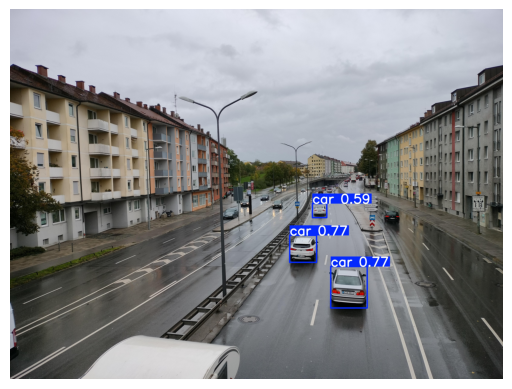

In [ ]:
results = model_train(["https://i.redd.it/ehp3ixup08r91.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result1.jpg")  # save to disk

from PIL import Image
import matplotlib.pyplot as plt

# The filename of the uploaded file
#filename = list(uploaded.keys())[0]

# Open the image file
image = Image.open("/content/result1.jpg")

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


If you want to deploy the model
Kindly visit this website: https://docs.ultralytics.com/integrations/
